<a href="https://colab.research.google.com/github/ssenichhh/Neural-Networks/blob/main/Fashion%20MNIST/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Part
The objective of this project is to get acquainted with the concept and architecture of autoencoders. The goal is to develop and train autoencoders using the Fashion MNIST dataset.

The Fashion MNIST dataset is similar to MNIST but contains images of clothing items. It includes 70,000 images categorized into 10 classes. Each image is 28x28 pixels and monochrome.

# Theoretical Background

**The Fashion-MNIST** dataset is a collection of images representing various clothing items and accessories, used for machine learning tasks and computer vision algorithm testing. It was created as a more challenging alternative to the classic MNIST dataset, which contains images of handwritten digits. Here are the main characteristics of Fashion-MNIST:

**Images:** The dataset contains 70,000 black-and-white images, split into training (60,000 images) and testing (10,000 images) sets. Each image has a resolution of 28x28 pixels.

**Classes:** There are 10 classes in Fashion-MNIST, each representing a different type of clothing or accessory, such as shoes, dresses, bags, etc.

**Usage:** This dataset is often used as input data for machine learning algorithms and computer vision tasks, particularly for image classification.

**Purpose:** The main purpose of Fashion-MNIST is to provide a more complex, yet structurally similar dataset to MNIST, allowing researchers to use it for more realistic testing and algorithm improvement.


# **Autoencoder with adam, relu, 8/16, sigmoid**

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
235/235 [==============================] - 86s 352ms/step - loss: 0.3600 - val_loss: 0.2997
Epoch 2/10
235/235 [==============================] - 73s 310ms/step - loss: 0.2908 - val_loss: 0.2890
Epoch 3/10
235/235 [==============================] - 73s 312ms/step - loss: 0.2838 - val_loss: 0.2835
Epoch 4/10
235/235 [==============================] - 73s 309ms/step - loss: 0.2798 - val_loss: 0.2807
Epoch 5/10
235/235 [==============================] - 70s 298ms/step - loss: 0.2770 - val_loss: 0.2779
Epoch 6/10
235/235 [==============================] - 75s 320ms/step - loss: 0.2750 - val_loss: 0.2764
Epoch 7/10
235/235 [==============================] - 73s 310ms/step - loss: 0.2736 - val_loss: 0.2751
Epoch 8/10
235/235 [==============================] - 73s 310ms/step - loss: 0.2725 - val_loss: 0.2741
Epoch 9/10
235/235 [==============================] - 72s 309ms/step - loss: 0.2716 - val_loss: 0.2732
Epoch 10/1

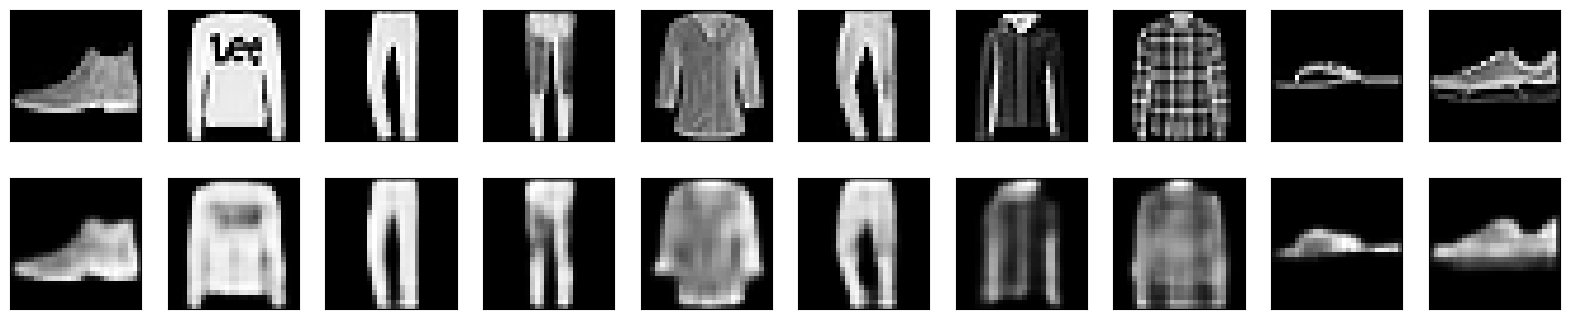

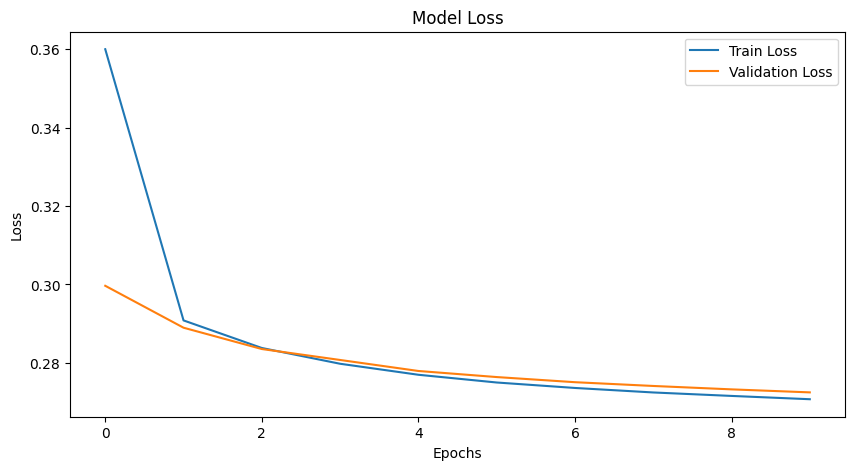

Average MSE: 0.009461527690291405
Standard deviation MSE: 0.0056121498346328735


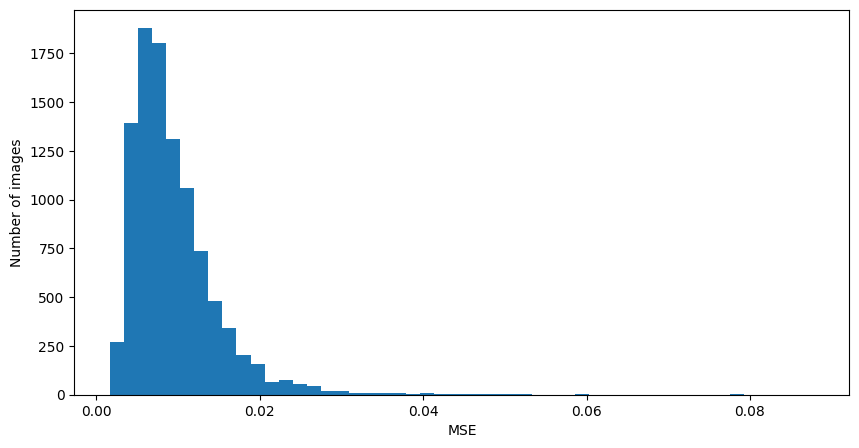

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# Load Fashion MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

# Input shape
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Visualize reconstructed images
decoded_imgs = autoencoder.predict(x_test)

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Plot model loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()

# Calculate and display MSE between original and replicated images
mse = np.mean(np.square(x_test - decoded_imgs), axis=(1, 2, 3))
print(f"Average MSE: {np.mean(mse)}")
print(f"Standard deviation MSE: {np.std(mse)}")
plt.figure(figsize=(10, 5))
plt.hist(mse, bins=50)
plt.xlabel('MSE')
plt.ylabel('Number of images')
plt.show()


# **Autoencoder with sgd, relu, 8/16, sigmoid**

Epoch 1/10
235/235 [==============================] - 83s 350ms/step - loss: 0.6219 - val_loss: 0.5459
Epoch 2/10
235/235 [==============================] - 65s 278ms/step - loss: 0.4426 - val_loss: 0.3848
Epoch 3/10
235/235 [==============================] - 66s 279ms/step - loss: 0.3671 - val_loss: 0.3562
Epoch 4/10
235/235 [==============================] - 67s 283ms/step - loss: 0.3464 - val_loss: 0.3417
Epoch 5/10
235/235 [==============================] - 68s 289ms/step - loss: 0.3360 - val_loss: 0.3345
Epoch 6/10
235/235 [==============================] - 67s 285ms/step - loss: 0.3301 - val_loss: 0.3296
Epoch 7/10
235/235 [==============================] - 65s 277ms/step - loss: 0.3259 - val_loss: 0.3260
Epoch 8/10
235/235 [==============================] - 66s 281ms/step - loss: 0.3226 - val_loss: 0.3230
Epoch 9/10
235/235 [==============================] - 71s 302ms/step - loss: 0.3198 - val_loss: 0.3205
Epoch 10/10
313/313 [==============================] - 4s 11ms/step


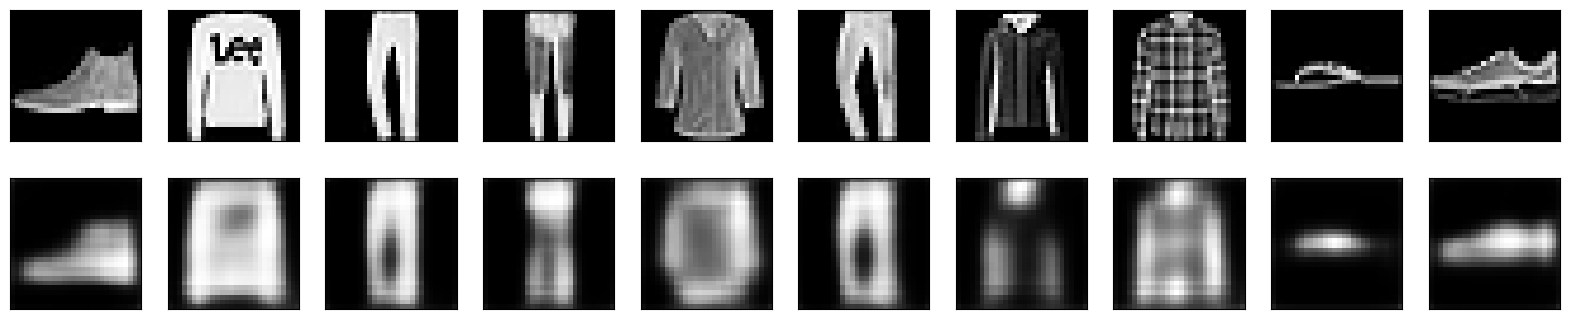

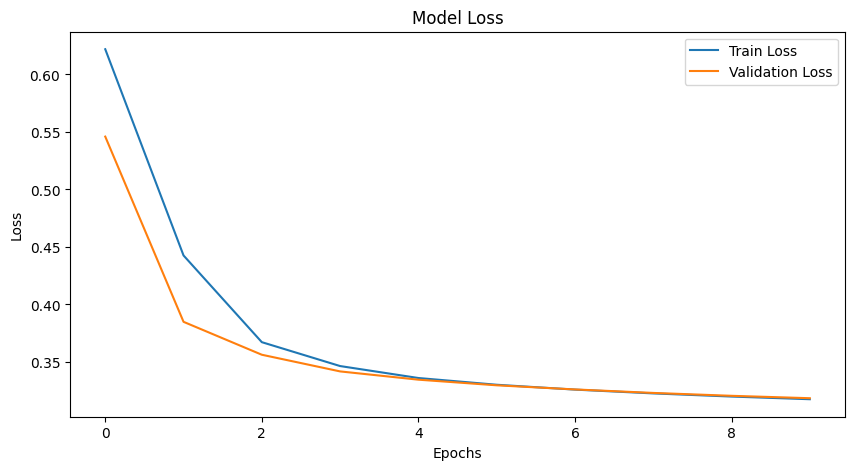

Average MSE: 0.023104650899767876
Standard deviation MSE: 0.009151376783847809


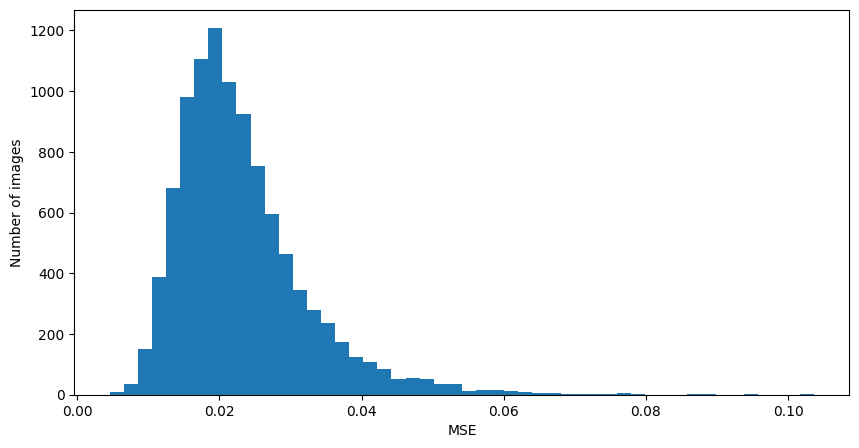

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# Load Fashion MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

# Input shape
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='sgd', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Visualize reconstructed images
decoded_imgs = autoencoder.predict(x_test)

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Plot model loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()

# Calculate and display MSE between original and replicated images
mse = np.mean(np.square(x_test - decoded_imgs), axis=(1, 2, 3))
print(f"Average MSE: {np.mean(mse)}")
print(f"Standard deviation MSE: {np.std(mse)}")
plt.figure(figsize=(10, 5))
plt.hist(mse, bins=50)
plt.xlabel('MSE')
plt.ylabel('Number of images')
plt.show()


# **Autoencoder with rmsprop, relu, 8/16, sigmoid**

Epoch 1/10
235/235 [==============================] - 71s 296ms/step - loss: 0.3676 - val_loss: 0.3176
Epoch 2/10
235/235 [==============================] - 63s 270ms/step - loss: 0.3070 - val_loss: 0.3029
Epoch 3/10
235/235 [==============================] - 71s 302ms/step - loss: 0.2965 - val_loss: 0.2948
Epoch 4/10
235/235 [==============================] - 64s 272ms/step - loss: 0.2900 - val_loss: 0.2888
Epoch 5/10
235/235 [==============================] - 67s 287ms/step - loss: 0.2860 - val_loss: 0.2858
Epoch 6/10
235/235 [==============================] - 64s 271ms/step - loss: 0.2834 - val_loss: 0.2841
Epoch 7/10
235/235 [==============================] - 68s 289ms/step - loss: 0.2814 - val_loss: 0.2824
Epoch 8/10
235/235 [==============================] - 80s 341ms/step - loss: 0.2799 - val_loss: 0.2827
Epoch 9/10
235/235 [==============================] - 65s 276ms/step - loss: 0.2786 - val_loss: 0.2821
Epoch 10/10
313/313 [==============================] - 4s 11ms/step


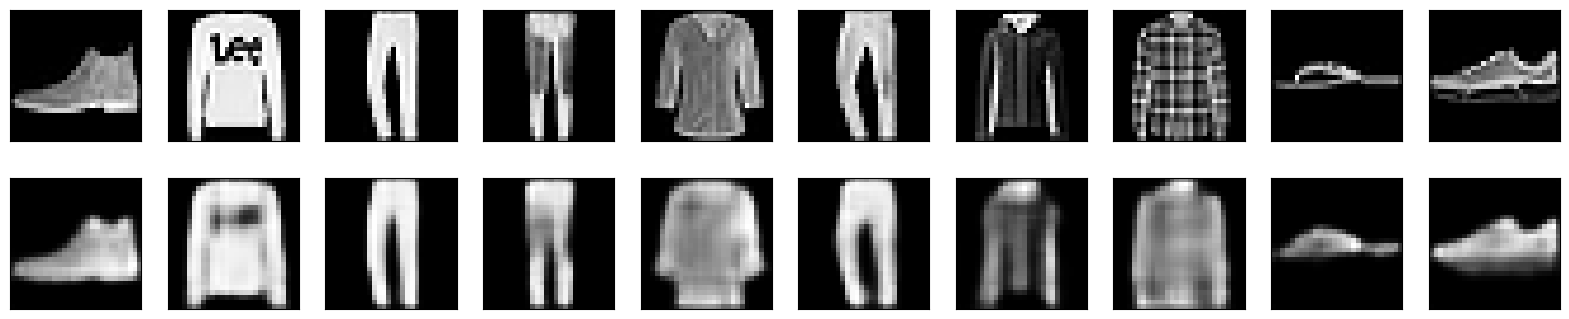

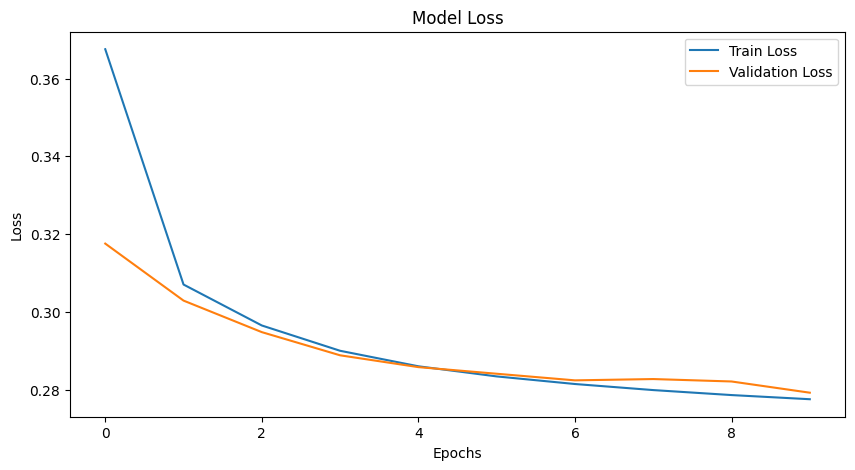

Average MSE: 0.011698385700583458
Standard deviation MSE: 0.006086282432079315


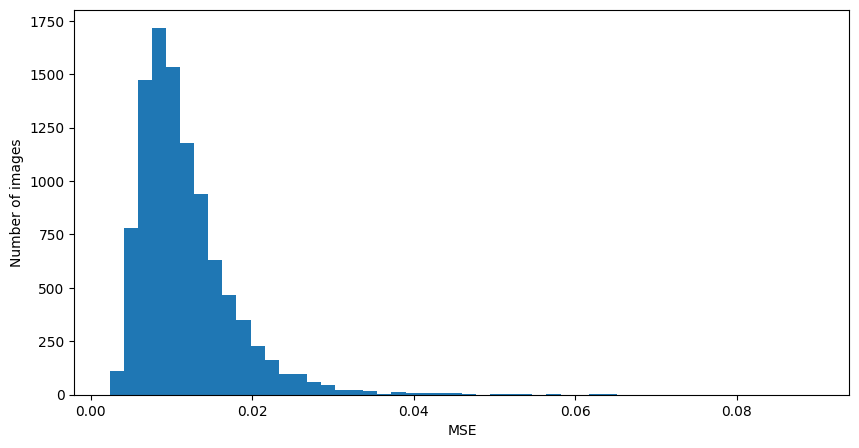

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# Load Fashion MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

# Input shape
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Visualize reconstructed images
decoded_imgs = autoencoder.predict(x_test)

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Plot model loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()

# Calculate and display MSE between original and replicated images
mse = np.mean(np.square(x_test - decoded_imgs), axis=(1, 2, 3))
print(f"Average MSE: {np.mean(mse)}")
print(f"Standard deviation MSE: {np.std(mse)}")
plt.figure(figsize=(10, 5))
plt.hist(mse, bins=50)
plt.xlabel('MSE')
plt.ylabel('Number of images')
plt.show()


# **Autoencoder with adam, elu, 16/32, sigmoid**

Epoch 1/10
235/235 [==============================] - 194s 818ms/step - loss: 0.3060 - val_loss: 0.2862
Epoch 2/10
235/235 [==============================] - 190s 811ms/step - loss: 0.2729 - val_loss: 0.2715
Epoch 3/10
235/235 [==============================] - 185s 788ms/step - loss: 0.2674 - val_loss: 0.2677
Epoch 4/10
235/235 [==============================] - 195s 831ms/step - loss: 0.2639 - val_loss: 0.2646
Epoch 5/10
235/235 [==============================] - 186s 790ms/step - loss: 0.2608 - val_loss: 0.2616
Epoch 6/10
235/235 [==============================] - 188s 801ms/step - loss: 0.2589 - val_loss: 0.2600
Epoch 7/10
235/235 [==============================] - 199s 848ms/step - loss: 0.2572 - val_loss: 0.2584
Epoch 8/10
235/235 [==============================] - 235s 1s/step - loss: 0.2561 - val_loss: 0.2575
Epoch 9/10
235/235 [==============================] - 208s 888ms/step - loss: 0.2552 - val_loss: 0.2580
Epoch 10/10
313/313 [==============================] - 10s 29ms/ste

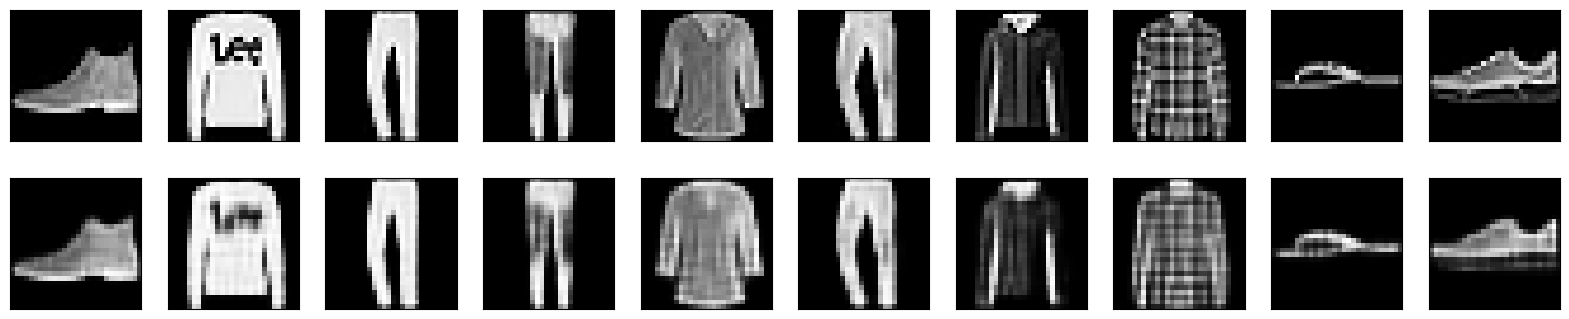

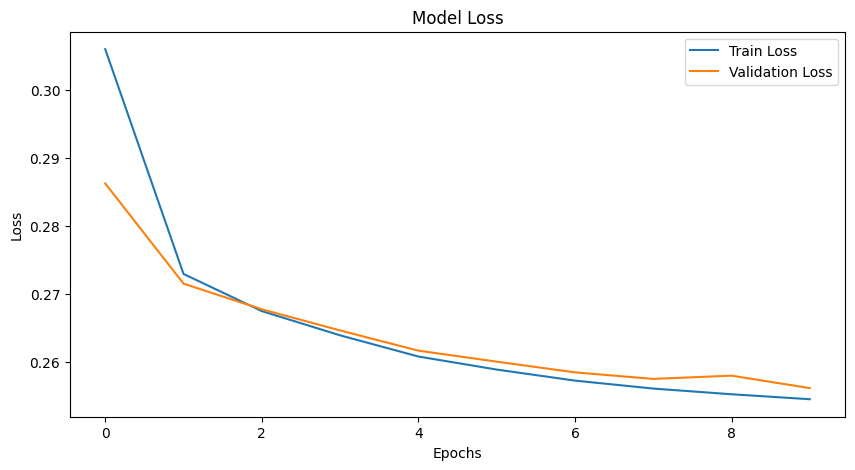

Average MSE: 0.0038864463567733765
Standard deviation MSE: 0.003144419053569436


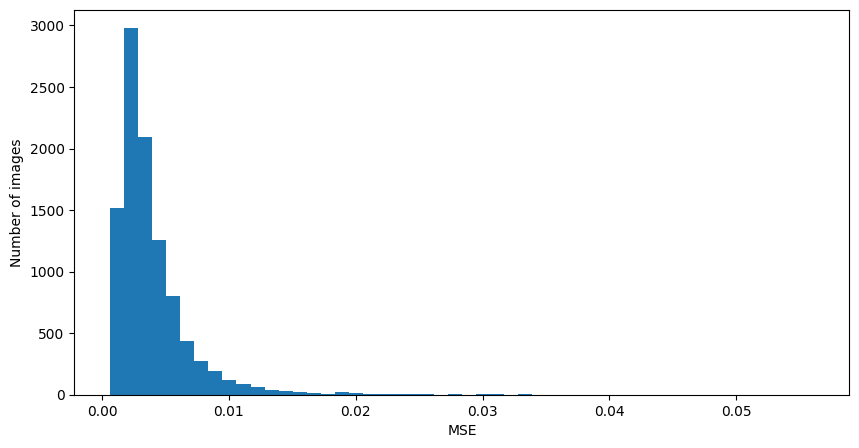

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# Load Fashion MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

# Input shape
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='elu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='elu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='elu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='elu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Visualize reconstructed images
decoded_imgs = autoencoder.predict(x_test)

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Plot model loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()

# Calculate and display MSE between original and replicated images
mse = np.mean(np.square(x_test - decoded_imgs), axis=(1, 2, 3))
print(f"Average MSE: {np.mean(mse)}")
print(f"Standard deviation MSE: {np.std(mse)}")
plt.figure(figsize=(10, 5))
plt.hist(mse, bins=50)
plt.xlabel('MSE')
plt.ylabel('Number of images')
plt.show()


# **Autoencoder with rmsprop, elu, 16/32, sigmoid**

Epoch 1/10
235/235 [==============================] - 187s 794ms/step - loss: 0.3285 - val_loss: 0.2995
Epoch 2/10
235/235 [==============================] - 191s 815ms/step - loss: 0.2819 - val_loss: 0.2799
Epoch 3/10
235/235 [==============================] - 190s 808ms/step - loss: 0.2748 - val_loss: 0.2743
Epoch 4/10
235/235 [==============================] - 192s 818ms/step - loss: 0.2703 - val_loss: 0.2694
Epoch 5/10
235/235 [==============================] - 189s 805ms/step - loss: 0.2667 - val_loss: 0.2666
Epoch 6/10
235/235 [==============================] - 189s 804ms/step - loss: 0.2644 - val_loss: 0.2652
Epoch 7/10
235/235 [==============================] - 194s 823ms/step - loss: 0.2627 - val_loss: 0.2634
Epoch 8/10
235/235 [==============================] - 192s 816ms/step - loss: 0.2615 - val_loss: 0.2621
Epoch 9/10
235/235 [==============================] - 190s 810ms/step - loss: 0.2605 - val_loss: 0.2616
Epoch 10/10
313/313 [==============================] - 8s 24ms/s

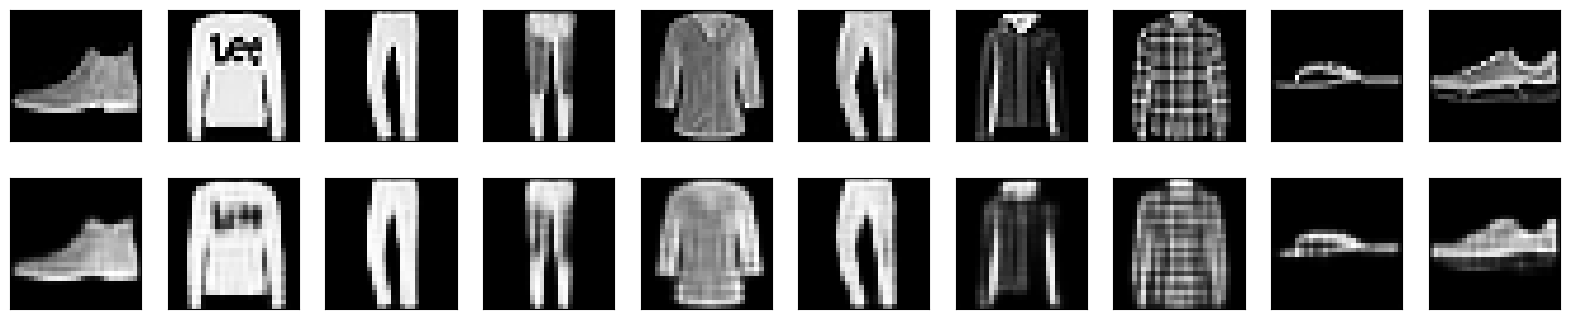

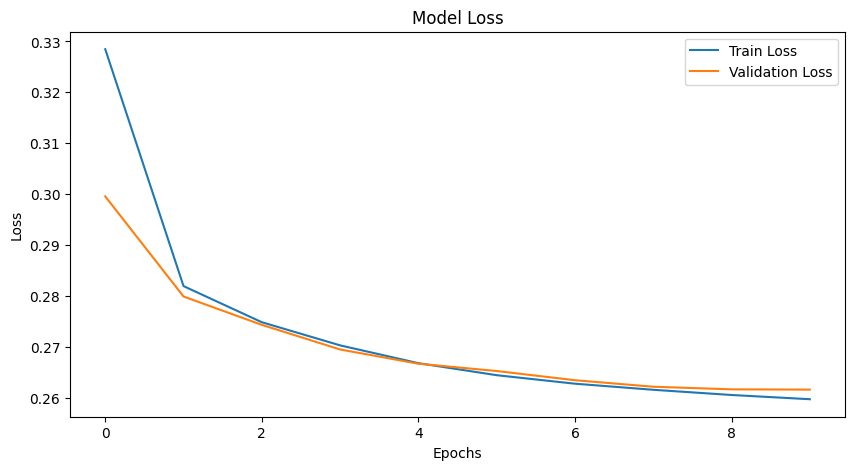

Average MSE: 0.005516032688319683
Standard deviation MSE: 0.003570581553503871


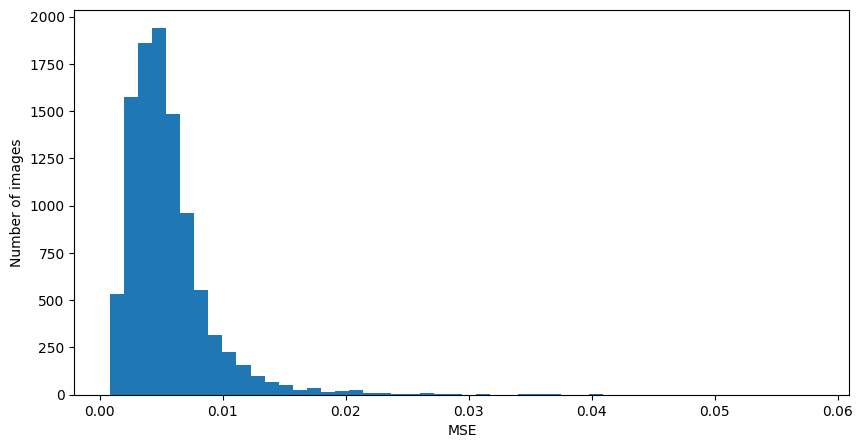

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# Load Fashion MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

# Input shape
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='elu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='elu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='elu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='elu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Visualize reconstructed images
decoded_imgs = autoencoder.predict(x_test)

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Plot model loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()

# Calculate and display MSE between original and replicated images
mse = np.mean(np.square(x_test - decoded_imgs), axis=(1, 2, 3))
print(f"Average MSE: {np.mean(mse)}")
print(f"Standard deviation MSE: {np.std(mse)}")
plt.figure(figsize=(10, 5))
plt.hist(mse, bins=50)
plt.xlabel('MSE')
plt.ylabel('Number of images')
plt.show()
